In [2]:
import tensorflow as tf
print(tf.__version__)

1.9.0


In [3]:
h = tf.constant("Hello")
w = tf.constant("Machine Learning!")
hw = h + w
print(hw)
with tf.Session() as sess:
    ans = sess.run(hw)
    print(ans)

Tensor("add:0", shape=(), dtype=string)
b'HelloTianlin!'


In [4]:
import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300

# 构造一个线性模型 
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.zeros([1,2]))
y = tf.matmul(W, x_data) + b
# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print (step, sess.run(W), sess.run(b))


0 [[0.24439411 0.2485181 ]] [0.4540079]
20 [[0.1100784  0.19376607]] [0.29782653]
40 [[0.10191986 0.19911864]] [0.29942018]
60 [[0.1003863  0.19991226]] [0.29983497]
80 [[0.10008373 0.2000058 ]] [0.2999508]
100 [[0.10001982 0.20000774]] [0.29998493]
120 [[0.1000051  0.20000349]] [0.2999953]
140 [[0.10000142 0.20000128]] [0.29999852]
160 [[0.10000045 0.20000045]] [0.2999995]
180 [[0.10000014 0.20000014]] [0.29999983]
200 [[0.10000009 0.20000009]] [0.2999999]


魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
5


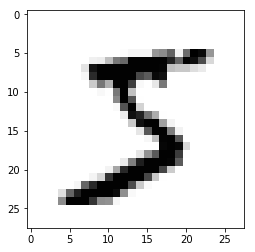

0


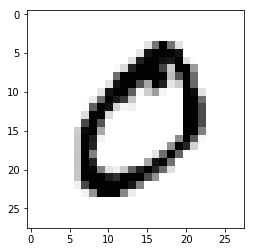

4


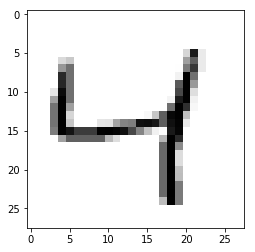

1


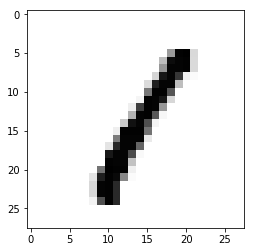

9


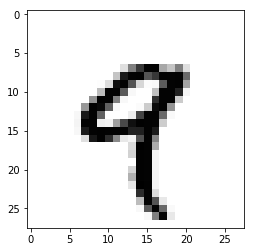

2


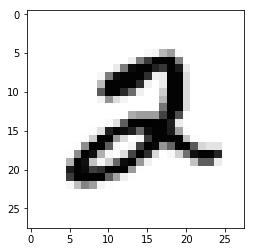

1


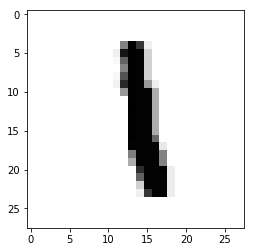

3


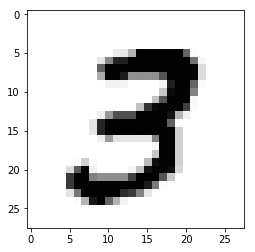

1


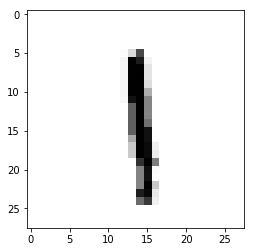

4


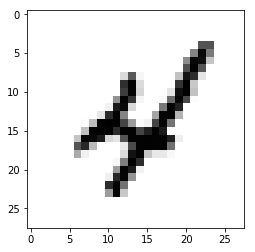

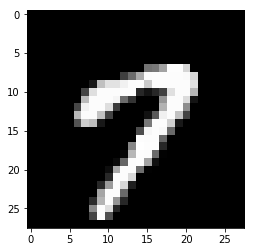

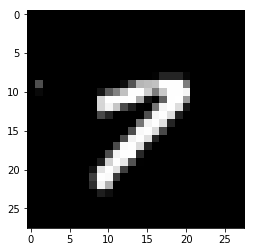

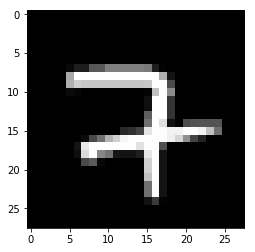

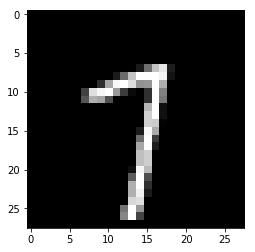

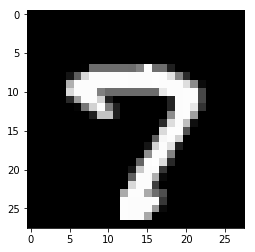

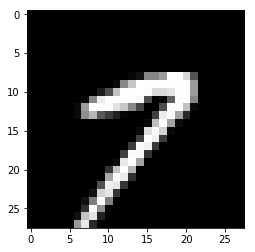

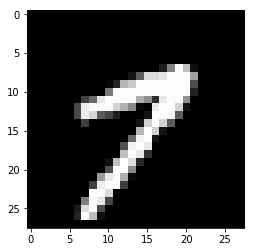

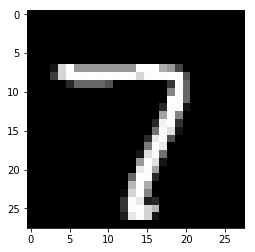

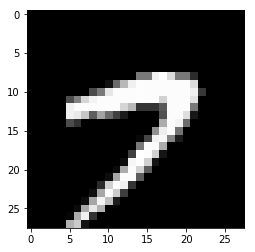

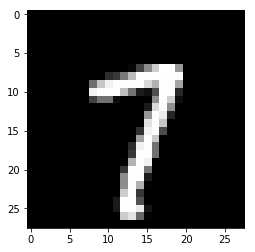

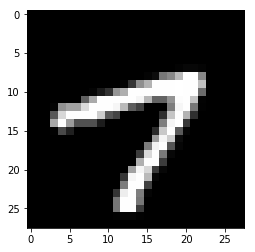

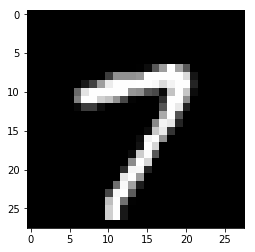

In [5]:
#理解MNIST数据集
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import struct
import numpy as np
import matplotlib.pyplot as plt

def read_file():
    with open("..//mnist//train-images-idx3-ubyte","rb") as f:
        train_image = f.read()
    with open('..//mnist//train-labels-idx1-ubyte', 'rb') as f:
        train_label = f.read()
    return train_image,train_label

train_image,train_label = read_file()
#因为数据结构中前4行的数据类型都是32位整型，所以采用i格式，但我们需要读取前4行数据，所以需要4个i。我们后面会看到标签集中，只使用2个ii。
fmt_header = '>IIII'
offset = 0
magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, train_image, offset)
print('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

offset_img = struct.calcsize(fmt_header)
offset_label = struct.calcsize(">II")
print(offset_img)
for i in range(10):#输出前十张图片和它们的标签
    temp = struct.unpack_from(">784B",train_image,offset_img)
    labels = struct.unpack_from(">B",train_label,offset_label)
    img = np.reshape(temp,(28,28))
    plt.imshow(img,cmap="Greys")
    offset_img += 28*28
    offset_label += struct.calcsize(">B")
    print(labels[0])
    plt.show()
for j in range(100):#输出前100个数字中 标签为7的所有数据
    labels = struct.unpack_from(">B",train_label,offset_label)
    if labels[0] == 7:
        temp = struct.unpack_from(">784B",train_image,offset_img)
        img = np.reshape(temp,(28,28))
        plt.imshow(img,cmap="gray")
        plt.show()
    offset_img += 28*28
    offset_label += struct.calcsize(">B")

In [42]:
    
""" Neural Network.
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""

from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("..//mnist//", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
        sess.run(init)

        for step in range(1, num_steps+1):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                     Y: batch_y})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")

        # Calculate accuracy for MNIST test images
        print("Testing Accuracy:", \
            sess.run(accuracy, feed_dict={X: mnist.test.images,
                                          Y: mnist.test.labels}))

Extracting mnist//train-images-idx3-ubyte.gz
Extracting mnist//train-labels-idx1-ubyte.gz
Extracting mnist//t10k-images-idx3-ubyte.gz
Extracting mnist//t10k-labels-idx1-ubyte.gz
Step 1, Minibatch Loss= 11861.4453, Training Accuracy= 0.320
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 100, Minibatch Loss= 250.3836, Training Accuracy= 0.883
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 200, Minibatch Loss= 127.0900, Training Accuracy= 0.828
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Step 300, Minibatch Loss= 158.1483, Tra